## Neural Network Activation Function Numpy Implementation

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In this tutorial I will implement 6 activation functions used in Neural Networks.
The activations are as follows:
    1. Sigmoid Activation
    2. Softmax Activation
    3. Tanh Activation
    4. ReLU Activation
    5. LeakyReLU Activation
    6. ELU Activation
 
 For each activation function I will do the following:
     1. Function Definition
     2. Numpy Implementation.
     3. Graphical Representation on the function using matplotlib package.
     4. Features of the activation function
     5. Problems with activation function
     
     

## Sigmoid Activation Function

Function Definition is as follows: 
# $f(x) = sigmoid(x) = \frac {1} {(1+ \exp^{-x})}$

[  4.53978687e-05   7.48462275e-05   1.23394576e-04   2.03426978e-04
   3.35350130e-04   5.52778637e-04   9.11051194e-04   1.50118226e-03
   2.47262316e-03   4.07013772e-03   6.69285092e-03   1.09869426e-02
   1.79862100e-02   2.93122308e-02   4.74258732e-02   7.58581800e-02
   1.19202922e-01   1.82425524e-01   2.68941421e-01   3.77540669e-01
   5.00000000e-01   6.22459331e-01   7.31058579e-01   8.17574476e-01
   8.80797078e-01   9.24141820e-01   9.52574127e-01   9.70687769e-01
   9.82013790e-01   9.89013057e-01   9.93307149e-01   9.95929862e-01
   9.97527377e-01   9.98498818e-01   9.99088949e-01   9.99447221e-01
   9.99664650e-01   9.99796573e-01   9.99876605e-01   9.99925154e-01]


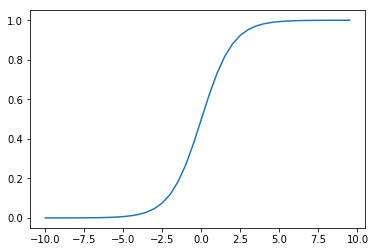

In [22]:
startValue = -10
endValue = 10
stepSize = 0.5 # Lower the step size steeper the graph

def sigmoidFunction(weightVector):
    sigWeight = 1/(1+np.exp(-weight))
    print sigWeight
    return sigWeight

def plotSigmoid(weightVector,sigWegiht):
    plt.plot(weight,sigWeight)

# Defining a weight array using numpy.arange function
weight = np.arange(startValue,endValue,stepSize)

# Convert the weight array to array of sigmoid probabilities 
sigWeight = sigmoidFunction(weight)

plotSigmoid(weight,sigWeight)

Features of Sigmoid Function:
    1. Squashes numbers between [0,1]
    2. Used for binary Classification in the final layer of the NN

Problems with Sigmoid Function:
    1. Saturation neurons kills the gradients during backpropogration. Consider the weights above 95th and below 5th percentile, the sigmoid of these weights will be near to 1 or 0 respectively which makes the delta very small thus negligible. 
    2. Sigmoid outputs are not zero centered, which makes the convergence a very slow process using the activation.
    3. numpy.exp() is an very expensive process (computationally) compared to the functions used in the other activations

## Softmax Activation

Function Definition is as follows:

## $f(x) = softmax(w) = \frac {\displaystyle\exp^{w_i}}{\displaystyle\sum_{i=0}^{y}\exp^{w_i}}$

[  3.49657920e-03   3.18392208e-01   3.78367114e-02   2.43855750e-03
   1.23805738e-04   9.57931556e-03   5.17589838e-01   1.76524460e-03
   9.37628704e-02   1.50148695e-02]


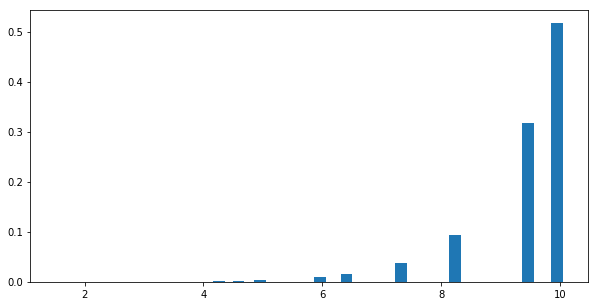

In [56]:
# Defining weights using random numbers between -10 and 10
weight = np.random.uniform(low=1, high=10, size=(10))

def softmaxFunction(weightVector):
    softmaxWeight = np.exp(weightVector)/np.exp(weightVector).sum()
    print softmaxWeight
    return softmaxWeight

def plotSoftmaxWeight(softmaxWeight,weight):
    width = 10
    height = 5
    plt.figure(figsize = (width,height))
    plt.bar(weight,softmaxWeight,width= 0.2,align="center",alpha=1)
    
softmaxWeight = softmaxFunction(weight)
plotSoftmaxWeight(softmaxWeight,weight)

Features of Softmax Function:
    1. Squashes numbers between [0,1] probabilities
    2. Used for multi-label Classification in the final layer of the NN
    

Problems with Softmax activation:
    1. Not zero centered, similar to sigmoid function
    2. Uses computionally expensive exp function. 

Basically, it has all the problems of sigmoid activation as it is just multi-label
classification function where sigmoid is a binary classification function.

## Tanh Activation

Function Definition is as follows: 

## $f(x) = tanh(x) = \frac{\exp^x - \exp^{-x}}{\exp^x + \exp^{-x}}$

[-1.         -0.99999999 -0.99999997 -0.99999992 -0.99999977 -0.99999939
 -0.99999834 -0.99999548 -0.99998771 -0.9999666  -0.9999092  -0.99975321
 -0.9993293  -0.9981779  -0.99505475 -0.9866143  -0.96402758 -0.90514825
 -0.76159416 -0.46211716  0.          0.46211716  0.76159416  0.90514825
  0.96402758  0.9866143   0.99505475  0.9981779   0.9993293   0.99975321
  0.9999092   0.9999666   0.99998771  0.99999548  0.99999834  0.99999939
  0.99999977  0.99999992  0.99999997  0.99999999]


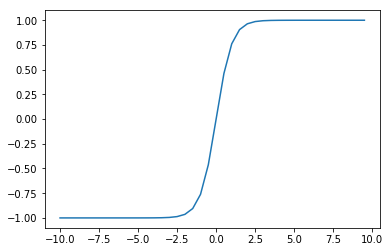

In [65]:
startValue = -10
endValue = 10
stepSize = 0.5 # Lower the step size steeper the graph

def tanhFunction(weightVector):
    numer = np.subtract(np.exp(weightVector),np.exp(-weightVector))
    denomer = np.add(np.exp(weightVector),np.exp(-weightVector))
    tanhWeight = np.divide(numer,denomer)
    print tanhWeight
    return tanhWeight

def plotTanhFunction(tanhWeight,weight):
    plt.plot(tanhWeight,weight)

# Defining weight array using np.arange function
weight = np.arange(startValue,endValue,stepSize)

# Converting weights to tanh range bound values
tanhWeight = tanhFunction(weight)

#Ploting tanh weights
plotTanhFunction(weight,tanhWeight)

Features of tanh activation function:
    1. Squashes the numbers between [-1,1]
    2. It solves the problem of zero centricity in sigmoid an softmax functions 
    3. It is used in the middle layers of NN

Problems of tanh activation function:
    1. The problem of gradient staturation still present.
    2. Use of expensive exp function is still there.

## Retified Linear Unit (ReLU) Activation and Variants

The function definition is as follows: 

## $f(x) = relu(x) = max(0,x)$

## $f(x) = leakyrelu(x) = max(0.1x,x)$


 ReLU Activation
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5
  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5]

Leaky ReLU Activation
[-1.   -0.95 -0.9  -0.85 -0.8  -0.75 -0.7  -0.65 -0.6  -0.55 -0.5  -0.45
 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.5   1.    1.5   2.
  2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5   8.    8.5
  9.    9.5 ]


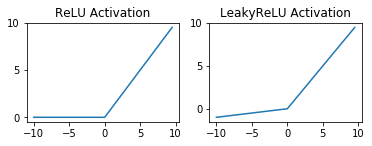

In [87]:
# Defining weights using random numbers between -10 and 10
weight = np.arange(-10,10,0.5)

def reluFunction(weightVector):
    reluWeight = np.maximum(0,weightVector)
    print reluWeight
    return reluWeight

def leakyReluFunction(weightVector):
    lReluWeight = np.maximum(np.dot(0.1,weightVector),weightVector)
    print lReluWeight
    return lReluWeight


def plotReluWeight(activationWeight,weight,num,title):
    plt.subplot(num)
    plt.plot(weight,activationWeight)
    plt.title(title)
    
plt.figure(1)
print "\n ReLU Activation"
# Calculating ReLU Weights 
reluWeight = reluFunction(weight)
# Plotting ReLU weights
plotReluWeight(reluWeight,weight,221,"ReLU Activation")

print "\nLeaky ReLU Activation"

# Calculating Leaky ReLU Weights 
lReluWeight = leakyReluFunction(weight)
# Plotting LeakyReLU weights
plotReluWeight(lReluWeight,weight,222,"LeakyReLU Activation")

Features of the Activation:
    1. There is no saturation of gradients (Problems of Sigmoid, Softmax and Tanh Solved)
    2. It is very efficient for computationally. 
    3. For depth > 5 always use ReLU activation for faster computation. Below 5 layers/depth    tanh can also be used. 
    4. Converges very fast (~6X faster than above activations)
    5. ReLU more widely used compared to LeakyReLU

Problems with ReLU activation:
    1. Not zero centric
    2. Presence of an annoyance (x<0) (But still works very well for most of the problems) which is solved in the variant LeakyReLU
    3. Problem mentioned in the above 2nd point also known as problem of dead neuron.